Сначала читаем датасет



In [2]:
import pandas as pd
lenn = 500
df = pd.read_csv('data/signal_100000_500.csv')
df.head()

,s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,...,spike492,spike493,spike494,spike495,spike496,spike497,spike498,spike499,spike500,no_spike
0,50,50,50,48,48,51,50,51,51,49,...,0,0,0,0,0,0,0,0,0,1
1,50,50,50,48,48,51,50,51,51,49,...,0,0,0,0,0,0,0,0,0,0
2,49,46,48,52,51,51,54,53,51,49,...,0,0,0,0,0,0,0,0,0,1
3,49,46,48,52,51,51,54,53,51,49,...,0,0,0,0,0,0,0,0,0,0
4,51,52,51,50,55,48,47,53,51,51,...,0,0,0,0,0,0,0,0,0,1


Строим график для примера одной из колонок

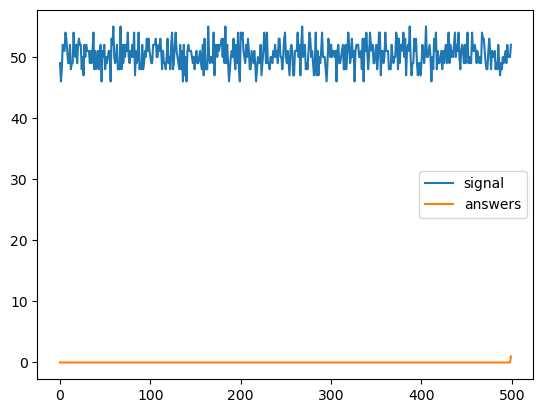

In [3]:
dataset = df.values

suka = pd.DataFrame({
   'signal': dataset[2][:lenn],
   'answers': dataset[2][lenn+1:]
   })
lines = suka.plot.line()

In [4]:
X = dataset[:,0:lenn]
print(X)

[[50 50 50 ... 51 53 51]
 [50 50 50 ... 63 65 63]
 [49 46 48 ... 50 50 52]
 ...
 [52 48 50 ... 65 64 66]
 [50 53 51 ... 52 49 52]
 [50 53 51 ... 64 61 64]]


In [5]:
Y = dataset[:,lenn:]
print(Y)

[[0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]
 [0 0 0 ... 0 0 0]]


In [6]:
from sklearn import preprocessing

In [7]:
min_max_scaler = preprocessing.MinMaxScaler()
X_scale = min_max_scaler.fit_transform(X)

In [8]:
X_scale

array([[0.19047619, 0.19047619, 0.19047619, ..., 0.23809524, 0.33333333,
        0.23809524],
       [0.19047619, 0.19047619, 0.19047619, ..., 0.80952381, 0.9047619 ,
        0.80952381],
       [0.14285714, 0.        , 0.0952381 , ..., 0.19047619, 0.19047619,
        0.28571429],
       ...,
       [0.28571429, 0.0952381 , 0.19047619, ..., 0.9047619 , 0.85714286,
        0.95238095],
       [0.19047619, 0.33333333, 0.23809524, ..., 0.28571429, 0.14285714,
        0.28571429],
       [0.19047619, 0.33333333, 0.23809524, ..., 0.85714286, 0.71428571,
        0.85714286]])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_val_and_test, Y_train, Y_val_and_test = train_test_split(X_scale, Y, test_size=0.3)

In [11]:
X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)
print(X_train.shape, X_val.shape, X_test.shape, Y_train.shape, Y_val.shape, Y_test.shape)

(140000, 500) (30000, 500) (30000, 500) (140000, 501) (30000, 501) (30000, 501)


In [12]:
from keras.models import Sequential
from keras.layers import Dense

In [13]:
model = Sequential([
    Dense(lenn, activation='relu', input_shape=(lenn,)),
    Dense(lenn, activation='relu'),
    Dense(lenn+1, activation='softmax'),
])

/opt/conda/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [14]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

Далее мы тренируем сетку нужно поиграться с размерами бача и чаислом эпох

In [ ]:
hist = model.fit(X_train, Y_train,
          batch_size=100, epochs=20,
          validation_data=(X_val, Y_val))

Epoch 1/20
   7/1400 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7265 - loss: 0.0023  

2024-05-14 18:14:39.945665: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 561120000 exceeds 10% of free system memory.


1400/1400 ━━━━━━━━━━━━━━━━━━━━ 12s 9ms/step - accuracy: 0.7268 - loss: 0.0023 - val_accuracy: 0.7057 - val_loss: 0.0024
Epoch 2/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7515 - loss: 0.0021 - val_accuracy: 0.7099 - val_loss: 0.0023
Epoch 3/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7752 - loss: 0.0020 - val_accuracy: 0.7304 - val_loss: 0.0022
Epoch 4/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.7940 - loss: 0.0019 - val_accuracy: 0.7382 - val_loss: 0.0022
Epoch 5/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8115 - loss: 0.0018 - val_accuracy: 0.7549 - val_loss: 0.0021
Epoch 6/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8261 - loss: 0.0017 - val_accuracy: 0.7648 - val_loss: 0.0020
Epoch 7/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8391 - loss: 0.0016 - val_accuracy: 0.7674 - val_loss: 0.0021
Epoch 8/20
1400/1400 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.8502 - loss: 0.0015 - val

In [1]:
model.evaluate(X_test, Y_test)[1]

NameError: name 'model' is not defined

In [84]:
Y_test

array([[0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [85]:
predictions = model.predict(X_test)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 579us/step


In [117]:
i = 0
arr = []
for x in Y_test:
  arr.append([abs(x - predictions[i]), i])
  i += 1

sorted_arr = sorted(arr, key=lambda x: sum(x[0]))
print(sum(sorted_arr[0][0]))


# suka = pd.DataFrame({
#    # 'signal': dataset[2][:100],
#    'vals': np.max(np.abs(Y_test - predictions), axis=1)
#    })
# lines = suka.plot.line()

8.974844525910167e-36


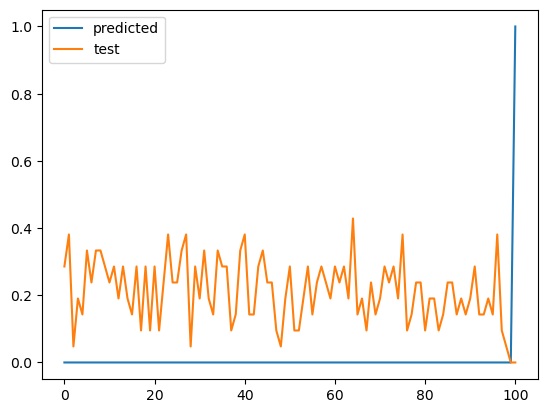

In [115]:
import numpy as np
num = 26265

predict_array = np.array(predictions[num])
df = pd.DataFrame({
   'predicted': predict_array,
   'test': np.append(X_test[num], [0.0])
   
   })
lines = df.plot.line()


На самом деле если присмотреться то моделька работает и выдает неплохие значения
Теперь мы сохраним дамп

In [40]:
# serialize model to JSON
model_json = model.to_json()
with open("./data/model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("./data/model.weights.h5")
print("Saved model to disk")

Saved model to disk


Теперь рекомендую воспользоваться [https://github.com/pplonski/keras2cpp] для того чтобы портировать нейронку в С++